In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from torchvision.datasets import FashionMNIST

# MNIST DATASET

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load the Fashion MNIST dataset
train_dataset = FashionMNIST(root='../data', train=True, download=True, transform=transform)
test_dataset = FashionMNIST(root='../data', train=False, download=True, transform=transform)

# split train dataset for train and validation
train_set, val_set = torch.utils.data.random_split(train_dataset, [50000, 10000])

# Filter out trousers from training data
train_data = []
train_labels = []
for data, label in train_dataset:
    if label != 1:
        train_data.append(data.view(-1))
        train_labels.append(label)

# Keep all training data
train_data = torch.stack(train_data)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

# Keep all validation data
val_data = torch.stack([data.view(-1) for data, _ in val_set])
val_labels = torch.tensor([label for _, label in val_set])
val_loader = DataLoader(TensorDataset(val_data, val_labels), batch_size=128)

# Keep all test data
test_data = torch.stack([data.view(-1) for data, _ in test_dataset])
test_labels = torch.tensor([label for _, label in test_dataset])
test_loader = DataLoader(TensorDataset(test_data, test_labels), batch_size=128)


In [3]:
ANOMALY_LABEL = 1

In [4]:
val_data.shape

torch.Size([10000, 784])

In [5]:
print(torch.unique(torch.tensor(val_labels), return_counts=True))
print(torch.unique(torch.tensor(test_labels), return_counts=True))
print(torch.unique(torch.tensor(train_labels), return_counts=True))

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([ 992,  986,  989,  986,  989, 1023, 1012,  998,  978, 1047]))
(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))
(tensor([0, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49131/435634570.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(val_labels), return_counts=True))
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49131/435634570.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(test_labels), return_counts=True))


In [6]:
# ------------------- -------------------
# Decrease amount of 1-9 digits in validation data set to 1/9 of its current amount
# ------------------- -------------------

indices_1_9 = (val_labels != 0).nonzero(as_tuple=True)[0]
indices_1_9 = val_labels != ANOMALY_LABEL
indices_0 = val_labels == ANOMALY_LABEL

print(len(val_data[indices_0]))
print(len(val_data[indices_1_9]))

# Randomly choose 1000 examples from val_data[indices_1_9]
num_samples = 1000
random_indices = torch.randperm(len(val_data[indices_1_9]))[:num_samples]
val_data_reduced = val_data[indices_1_9][random_indices]
val_labels_reduced = val_labels[indices_1_9][random_indices]

print(len(val_data_reduced))
print(len(val_labels_reduced))

print(torch.unique(val_labels_reduced, return_counts=True))

val_data_reduced = torch.cat((val_data_reduced, val_data[indices_0]), dim=0)
val_labels_reduced = torch.cat((val_labels_reduced, val_labels[indices_0]), dim=0)

print(len(val_data_reduced))
print(len(val_labels_reduced))

print(torch.unique(val_labels_reduced, return_counts=True))

# Reduced validation data loader
val_loader_reduced = DataLoader(TensorDataset(val_data_reduced, val_labels_reduced), batch_size=128, shuffle=True) # shuffle is optional

986
9014
1000
1000
(tensor([0, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([108, 119,  98, 122, 108, 105, 116, 114, 110]))
1986
1986
(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([108, 986, 119,  98, 122, 108, 105, 116, 114, 110]))


In [7]:
print(torch.unique(torch.tensor(val_labels_reduced), return_counts=True))
print(torch.unique(torch.tensor(test_labels), return_counts=True))
print(torch.unique(torch.tensor(train_labels), return_counts=True))

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([108, 986, 119,  98, 122, 108, 105, 116, 114, 110]))
(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))
(tensor([0, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49131/2262724207.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(val_labels_reduced), return_counts=True))
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49131/2262724207.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(test_labels), return_counts=True))


# Autoencoders

## Autoencoders definitions

In [8]:
# SSIM Loss implementation
class SSIM(nn.Module):
    def __init__(self, window_size=11):
        super(SSIM, self).__init__()
        self.window_size = window_size
        self.channel = 1
        self.window = self.create_window()

    def gaussian(self, window_size, sigma=1.5):
        gauss = torch.Tensor([np.exp(-(x - window_size//2)**2/float(2*sigma**2)) for x in range(window_size)])
        return gauss/gauss.sum()

    def create_window(self):
        _1D_window = self.gaussian(self.window_size).unsqueeze(1)
        _2D_window = _1D_window.mm(_1D_window.t()).float().unsqueeze(0).unsqueeze(0)
        window = _2D_window.expand(self.channel, 1, self.window_size, self.window_size).contiguous()
        return window

    def forward(self, img1, img2):
        window = self.window.to(img1.device)
        return 1 - self._ssim(img1, img2, window)

    def _ssim(self, img1, img2, window):
        mu1 = nn.functional.conv2d(img1, window, padding=self.window_size//2, groups=self.channel)
        mu2 = nn.functional.conv2d(img2, window, padding=self.window_size//2, groups=self.channel)

        mu1_sq = mu1.pow(2)
        mu2_sq = mu2.pow(2)
        mu1_mu2 = mu1 * mu2

        sigma1_sq = nn.functional.conv2d(img1 * img1, window, padding=self.window_size//2, groups=self.channel) - mu1_sq
        sigma2_sq = nn.functional.conv2d(img2 * img2, window, padding=self.window_size//2, groups=self.channel) - mu2_sq
        sigma12 = nn.functional.conv2d(img1 * img2, window, padding=self.window_size//2, groups=self.channel) - mu1_mu2

        C1 = 0.01**2
        C2 = 0.03**2

        ssim_map = ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*(sigma1_sq + sigma2_sq + C2))
        return ssim_map.mean()
    
# za duzy latent space
# zmniejszyc liczbe neuronow
# weight decay mozna zmniejszyc
# oslabic architekture
# czasami ciezko jest zredukowac blad, bo model sie nauczy, zeby zwracac to samo co wejscie

# Autoencoder Model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Autoencoder Model with 16 latent space
class Autoencoder_16(nn.Module):
    def __init__(self):
        super(Autoencoder_16, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# Autoencoder Model with 8 latent space
class Autoencoder_8(nn.Module):
    def __init__(self):
        super(Autoencoder_8, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# BigAutoencoder Model
class BigAutoencoder(nn.Module):
    def __init__(self):
        super(BigAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# BigAutoencoder Model
class BigAutoencoder_16(nn.Module):
    def __init__(self):
        super(BigAutoencoder_16, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
class BigAutoencoder_8(nn.Module):
    def __init__(self):
        super(BigAutoencoder_8, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# SmallAutoencoder Model
class SmallAutoencoder(nn.Module):
    def __init__(self):
        super(SmallAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# SmallAutoencoder Model with 16 latent space
class SmallAutoencoder_16(nn.Module):
    def __init__(self):
        super(SmallAutoencoder_16, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# SmallAutoencoder Model with 8 latent space
class SmallAutoencoder_8(nn.Module):
    def __init__(self):
        super(SmallAutoencoder_8, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



## SmallAutoencoder model

[[], [], []]
[[], [], []]
Model nr 0. Epoch [1/15], Train_loss: 0.0378, Val_loss: 0.0250
Model nr 0. Epoch [2/15], Train_loss: 0.0215, Val_loss: 0.0216
Model nr 0. Epoch [3/15], Train_loss: 0.0188, Val_loss: 0.0198
Model nr 0. Epoch [4/15], Train_loss: 0.0173, Val_loss: 0.0185
Model nr 0. Epoch [5/15], Train_loss: 0.0164, Val_loss: 0.0177
Model nr 0. Epoch [6/15], Train_loss: 0.0157, Val_loss: 0.0169
Model nr 0. Epoch [7/15], Train_loss: 0.0150, Val_loss: 0.0164
Model nr 0. Epoch [8/15], Train_loss: 0.0145, Val_loss: 0.0156
Model nr 0. Epoch [9/15], Train_loss: 0.0140, Val_loss: 0.0152
Model nr 0. Epoch [10/15], Train_loss: 0.0137, Val_loss: 0.0149
Model nr 0. Epoch [11/15], Train_loss: 0.0133, Val_loss: 0.0147
Model nr 0. Epoch [12/15], Train_loss: 0.0131, Val_loss: 0.0144
Model nr 0. Epoch [13/15], Train_loss: 0.0128, Val_loss: 0.0141
Model nr 0. Epoch [14/15], Train_loss: 0.0126, Val_loss: 0.0137
Model nr 0. Epoch [15/15], Train_loss: 0.0124, Val_loss: 0.0136
Model nr 1. Epoch [1/15

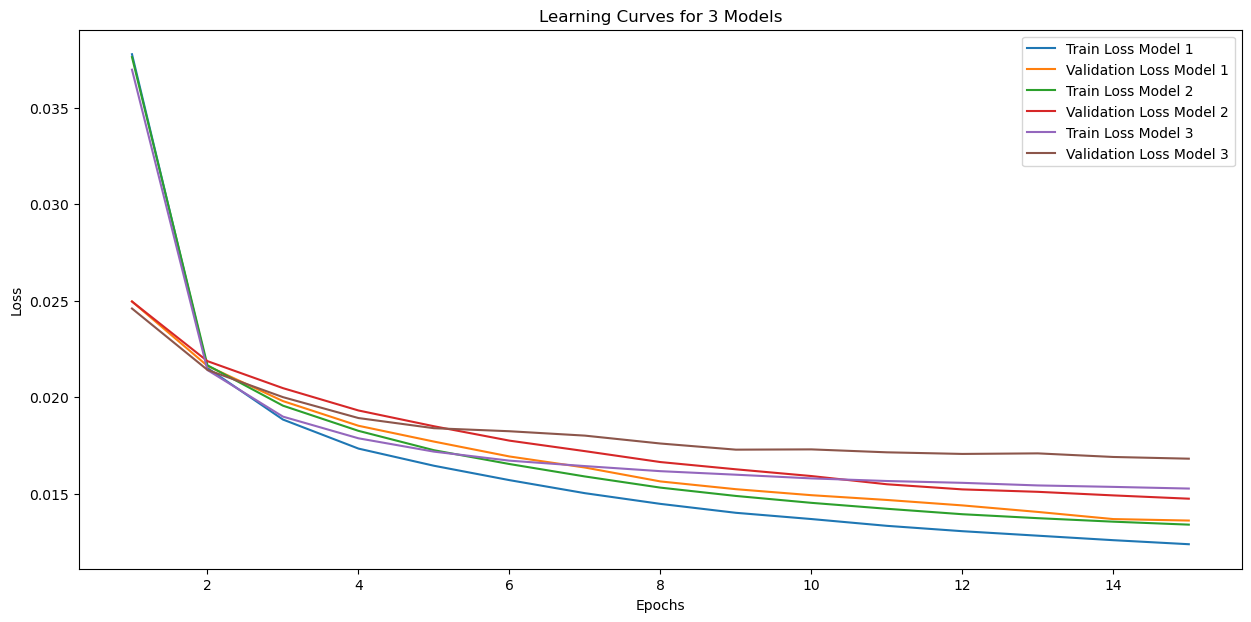

In [9]:
# ONE CODE

# initialization
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model_1 = SmallAutoencoder()
model_2 = SmallAutoencoder_16()
model_3 = SmallAutoencoder_8()
models = [model_1, model_2, model_3]

criterion = nn.MSELoss()

# Lists to store losses
train_losses = [[], [], []]
val_losses = [[], [], []]
print(train_losses)
print(val_losses)

# train 
num_epochs = 15
for idx, model in enumerate(models):
    model.to(device)
    model.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
    for epoch in range(num_epochs):
        epoch_train_loss = 0
        for batch in train_loader:
            batch = batch.to(device)
            batch_reshaped = batch

            optimizer.zero_grad()
            output = model(batch)

            loss = criterion(output, batch_reshaped)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        epoch_train_loss /= len(train_loader)
        train_losses[idx].append(epoch_train_loss)

        # validation loss
        with torch.no_grad():
            val_loss = 0
            for val_batch, _ in val_loader:
                val_batch = val_batch.to(device)
                val_batch_reshaped = val_batch
                val_output = model(val_batch)
                val_loss += criterion(val_output, val_batch_reshaped)
            val_loss /= len(val_loader)
            val_losses[idx].append(val_loss.item())

        print(f'Model nr {idx}. Epoch [{epoch+1}/{num_epochs}], Train_loss: {epoch_train_loss:.4f}, Val_loss: {val_loss.item():.4f}')

# Plot the learning curve for 3 models
plt.figure(figsize=(15, 7))
for idx in range(3):
    plt.plot(range(1, num_epochs + 1), train_losses[idx], label=f'Train Loss Model {idx+1}')
    plt.plot(range(1, num_epochs + 1), val_losses[idx], label=f'Validation Loss Model {idx+1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves for 3 Models')
plt.legend()
plt.show()

In [10]:
thresholds = torch.linspace(0, 1, 20)

all_predictions = [[] for _ in range(len(models))]
all_labels = [[] for _ in range(len(models))]
for idx, model in enumerate(models):
    model.eval()
    with torch.no_grad():
        for val_batch, val_label in val_loader_reduced:
            for example, label in zip(val_batch, val_label):
                example = example.to(device)
                out = model(example)
                all_predictions[idx].append(criterion(example, out).unsqueeze(0))
                all_labels[idx].append(label.unsqueeze(0))

# concatenate all predictions and labels and change it to tensor
for idx, l in enumerate(all_predictions):
    all_predictions[idx] = torch.cat(l)
    all_labels[idx] = torch.cat(all_labels[idx])

    assert len(all_predictions[idx]) == len(all_labels[idx])
    assert len(all_predictions[idx]) == len(val_data_reduced)


tprs = [[] for _ in range(len(models))]
fprs = [[] for _ in range(len(models))]
f1_scores = [[] for _ in range(len(models))]
precisions = [[] for _ in range(len(models))]
recalls = [[] for _ in range(len(models))]
sorted_labels = [[] for _ in range(len(models))]

# sort all_predictions and all_labels according to all_predictions
for idx, predictions in enumerate(all_predictions):
    all_predictions[idx], indices = torch.sort(predictions, descending=True)
    sorted_labels[idx] = [all_labels[idx][i] for i in indices.cpu()]
    neg_pos_labels = torch.tensor([1 if label == ANOMALY_LABEL else 0 for label in sorted_labels[idx]])
    sorted_labels_indices = torch.tensor(sorted_labels[idx])

    # indices of 0
    zeros_indices = sorted_labels_indices == ANOMALY_LABEL
    # indices of other digits
    other_indices = sorted_labels_indices != ANOMALY_LABEL
    for threshold in thresholds:
        positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), threshold)
        negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), threshold)

        tp = positive_class[zeros_indices].sum()
        fn = negative_class[zeros_indices].sum()
        tn = negative_class[other_indices].sum()
        fp = positive_class[other_indices].sum()

        tpr = tp/(tp + fn)
        fpr = fp/(fp + tn)
        fprs[idx].append(fpr.cpu())
        tprs[idx].append(tpr.cpu())

        f1_score = 2*tp/(2*tp + fp + fn)
        precision = tp/(tp + fp)
        recall = tp/(tp + fn)

        f1_scores[idx].append(f1_score.cpu())
        precisions[idx].append(precision.cpu())
        recalls[idx].append(recall.cpu())

    # Find the threshold with the highest F1 score
    best_threshold_index = torch.argmax(torch.tensor(f1_scores[idx]))
    best_threshold = thresholds[best_threshold_index]
    best_precision = precisions[idx][best_threshold_index]
    best_recall = recalls[idx][best_threshold_index]

    print(f'Model nr {idx}. Best Threshold: {best_threshold:.4f}')
    print(f'Model nr {idx}. Precision at Best Threshold: {best_precision:.4f}')
    print(f'Model nr {idx}. Recall at Best Threshold: {best_recall:.4f}')

    positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])
    negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])

    tp = positive_class[zeros_indices].sum()
    fn = negative_class[zeros_indices].sum()
    tn = negative_class[other_indices].sum()
    fp = positive_class[other_indices].sum()

    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)

Model nr 0. Best Threshold: 0.4211
Model nr 0. Precision at Best Threshold: 0.7678
Model nr 0. Recall at Best Threshold: 0.8955
Model nr 1. Best Threshold: 0.4211
Model nr 1. Precision at Best Threshold: 0.7652
Model nr 1. Recall at Best Threshold: 0.8925
Model nr 2. Best Threshold: 0.4211
Model nr 2. Precision at Best Threshold: 0.7600
Model nr 2. Recall at Best Threshold: 0.8864


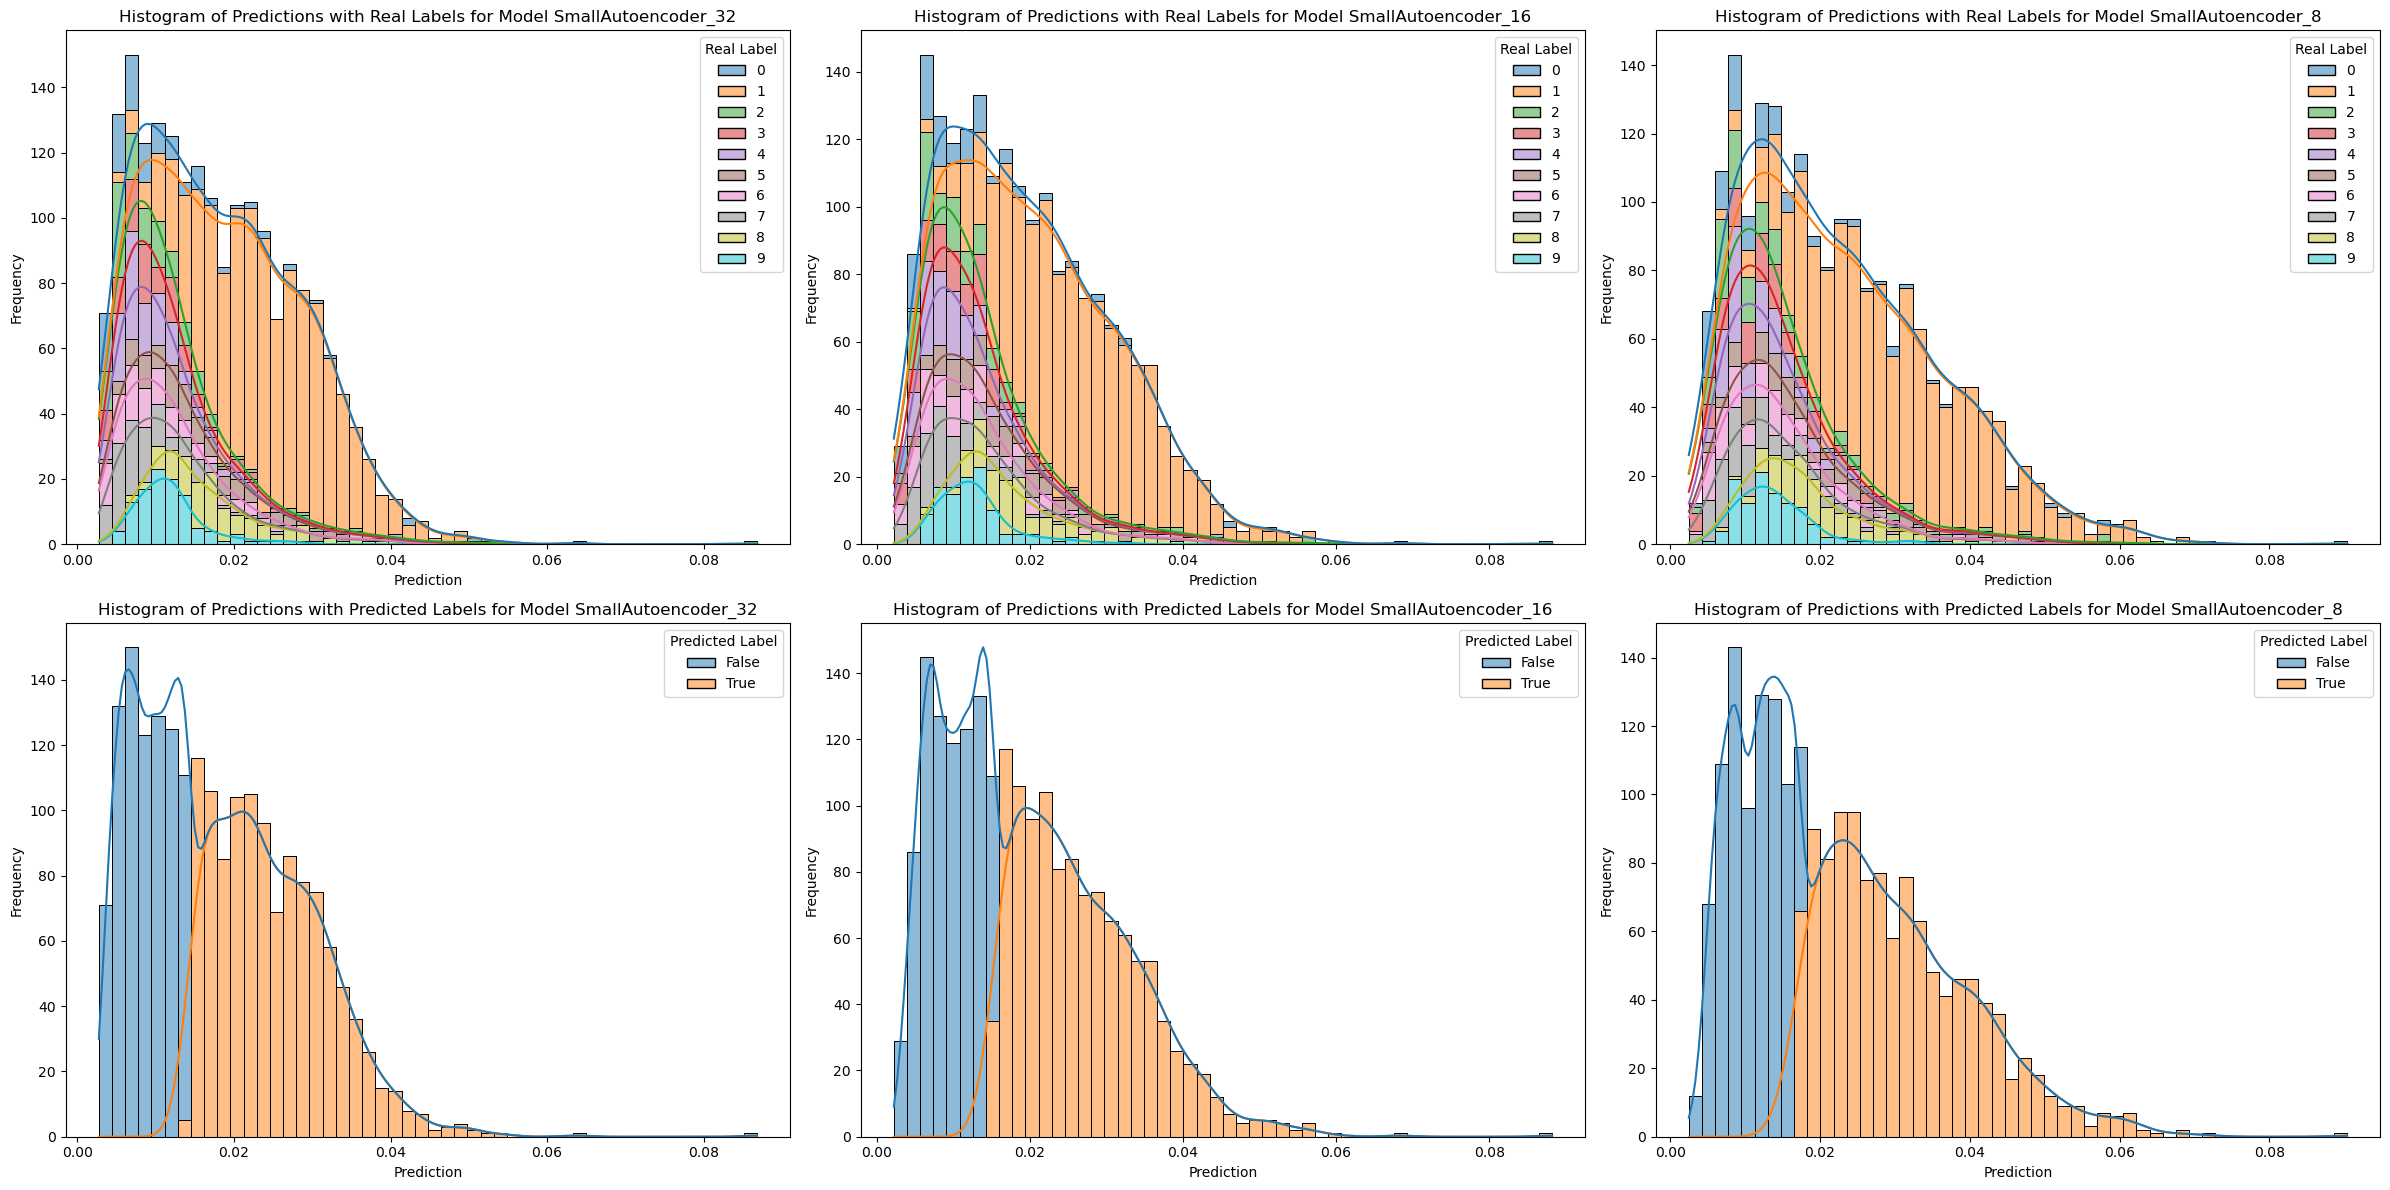

In [11]:
import seaborn as sns
import pandas as pd

names = {
    0: 'SmallAutoencoder_32',
    1: 'SmallAutoencoder_16',
    2: 'SmallAutoencoder_8'
}

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()
    predicted_labels_np = (all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])).cpu().numpy()

    # Create a DataFrame for easier plotting
    data = {
        'Prediction': all_predictions_np,
        'Real Label': sorted_labels_np,
        'Predicted Label': predicted_labels_np
    }

    df = pd.DataFrame(data)

    # Plot the histogram of predictions with real labels
    sns.histplot(data=df, x='Prediction', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[0, idx])
    axes[0, idx].set_title(f'Histogram of Predictions with Real Labels for Model {names[idx]}')
    axes[0, idx].set_xlabel('Prediction')
    axes[0, idx].set_ylabel('Frequency')

    # Plot the histogram of predictions with predicted labels
    sns.histplot(data=df, x='Prediction', hue='Predicted Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[1, idx])
    axes[1, idx].set_title(f'Histogram of Predictions with Predicted Labels for Model {names[idx]}')
    axes[1, idx].set_xlabel('Prediction')
    axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

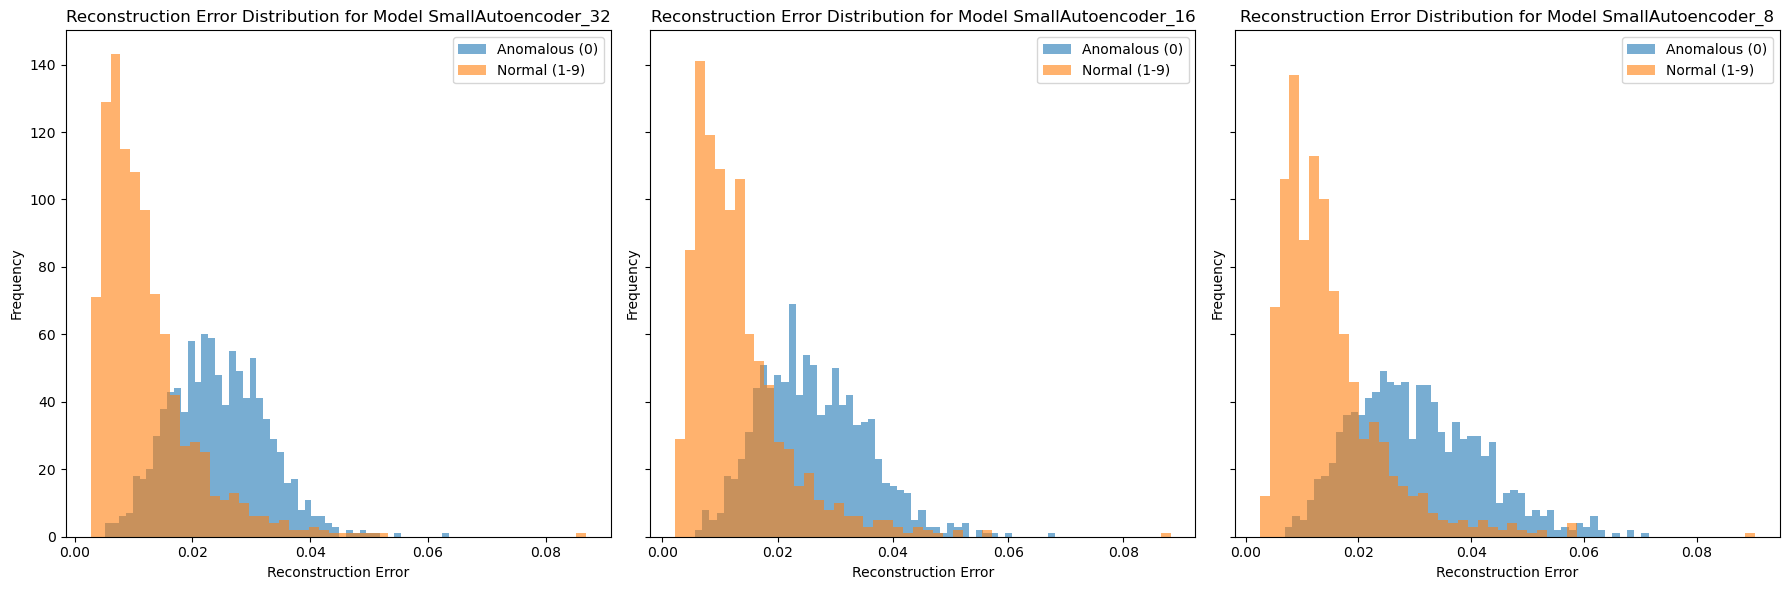

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()

    # Plot the histogram
    axes[idx].hist(all_predictions_np[sorted_labels_np == ANOMALY_LABEL], bins=50, alpha=0.6, label="Anomalous (0)")
    axes[idx].hist(all_predictions_np[sorted_labels_np != ANOMALY_LABEL], bins=50, alpha=0.6, label="Normal (1-9)")
    axes[idx].set_xlabel("Reconstruction Error")
    axes[idx].set_ylabel("Frequency")
    axes[idx].set_title(f"Reconstruction Error Distribution for Model {names[idx]}")
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [13]:
# # Function to calculate reconstruction loss
# def calculate_reconstruction_loss(data, model):
#     reconstructions = model(data)
#     reconstruction_errors = torch.mean(torch.abs(data - reconstructions), axis=1)
#     return reconstruction_errors

# # Calculate reconstruction loss for normal and anomalous images
# for i in range(10):
#     anomalous_images = test_data[test_labels == i]
#     anomalous_images_tensor = torch.tensor(anomalous_images, dtype=torch.float32).to(device)
#     reconstruction_loss_anomalous = calculate_reconstruction_loss(anomalous_images_tensor, model)
#     print(f"Anomalous images of number {i}: {reconstruction_loss_anomalous.mean()}")


# reconstruction_loss_normal = calculate_reconstruction_loss(next(iter(test_loader))[0].to(device), model)
# print(f"Normal images: {reconstruction_loss_normal.mean()}")


In [14]:
# # Reconstruct images from test_loader and plot those with the biggest loss
# import matplotlib.pyplot as plt

# # Get a batch of test data
# test_images, _ = next(iter(test_loader))
# test_images = test_images.to(device)

# # Calculate reconstruction loss for the batch
# reconstruction_losses = calculate_reconstruction_loss(test_images, model)
# print(reconstruction_losses)

# # Get indices of images with the biggest loss
# num_images_to_plot = 5
# _, indices = torch.topk(reconstruction_losses, num_images_to_plot)

# print(reconstruction_losses[indices])

# # Plot the original and reconstructed images with the biggest loss
# fig, axes = plt.subplots(num_images_to_plot, 2, figsize=(10, 10))

# for i, idx in enumerate(indices):
#     original_image = test_images[idx].cpu().view(28, 28).detach().numpy()
#     reconstructed_image = model(test_images[idx].unsqueeze(0)).cpu().view(28, 28).detach().numpy()

#     axes[i, 0].imshow(original_image, cmap='gray')
#     axes[i, 0].set_title(f'Original Image {i+1}')
#     axes[i, 0].axis('off')

#     axes[i, 1].imshow(reconstructed_image, cmap='gray')
#     axes[i, 1].set_title(f'Reconstructed Image {i+1}')
#     axes[i, 1].axis('off')

# plt.tight_layout()
# plt.show()

In [15]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Get predictions and actual labels
# predictions = []
# actual = []

# model.eval()
# with torch.no_grad():
#     for data, labels in test_loader:
#         data = data.to(device)
#         outputs = model(data)
#         reconstruction_errors = torch.mean(torch.abs(data - outputs), axis=1)
#         preds = reconstruction_errors > threshold
#         predictions.extend(preds.cpu().numpy())
#         actual.extend(labels.cpu().numpy())

# # Convert lists to numpy arrays
# predictions = np.array(predictions)
# actual = np.array(actual)

# # Calculate metrics
# accuracy = accuracy_score(actual, predictions)
# precision = precision_score(actual, predictions, average='binary')
# recall = recall_score(actual, predictions, average='binary')
# f1 = f1_score(actual, predictions, average='binary')

# print(f'Accuracy: {accuracy:.4f}')
# print(f'Precision: {precision:.4f}')
# print(f'Recall: {recall:.4f}')
# print(f'F1 Score: {f1:.4f}')

## BigAutoencoder Model

[[], [], []]
[[], [], []]
Model nr 0. Epoch [1/25], Train_loss: 0.0447, Val_loss: 0.0288
Model nr 0. Epoch [2/25], Train_loss: 0.0258, Val_loss: 0.0259
Model nr 0. Epoch [3/25], Train_loss: 0.0231, Val_loss: 0.0234
Model nr 0. Epoch [4/25], Train_loss: 0.0213, Val_loss: 0.0224
Model nr 0. Epoch [5/25], Train_loss: 0.0205, Val_loss: 0.0217
Model nr 0. Epoch [6/25], Train_loss: 0.0200, Val_loss: 0.0217
Model nr 0. Epoch [7/25], Train_loss: 0.0195, Val_loss: 0.0210
Model nr 0. Epoch [8/25], Train_loss: 0.0190, Val_loss: 0.0201
Model nr 0. Epoch [9/25], Train_loss: 0.0183, Val_loss: 0.0198
Model nr 0. Epoch [10/25], Train_loss: 0.0180, Val_loss: 0.0194
Model nr 0. Epoch [11/25], Train_loss: 0.0176, Val_loss: 0.0191
Model nr 0. Epoch [12/25], Train_loss: 0.0172, Val_loss: 0.0188
Model nr 0. Epoch [13/25], Train_loss: 0.0169, Val_loss: 0.0186
Model nr 0. Epoch [14/25], Train_loss: 0.0166, Val_loss: 0.0182
Model nr 0. Epoch [15/25], Train_loss: 0.0163, Val_loss: 0.0178
Model nr 0. Epoch [16/2

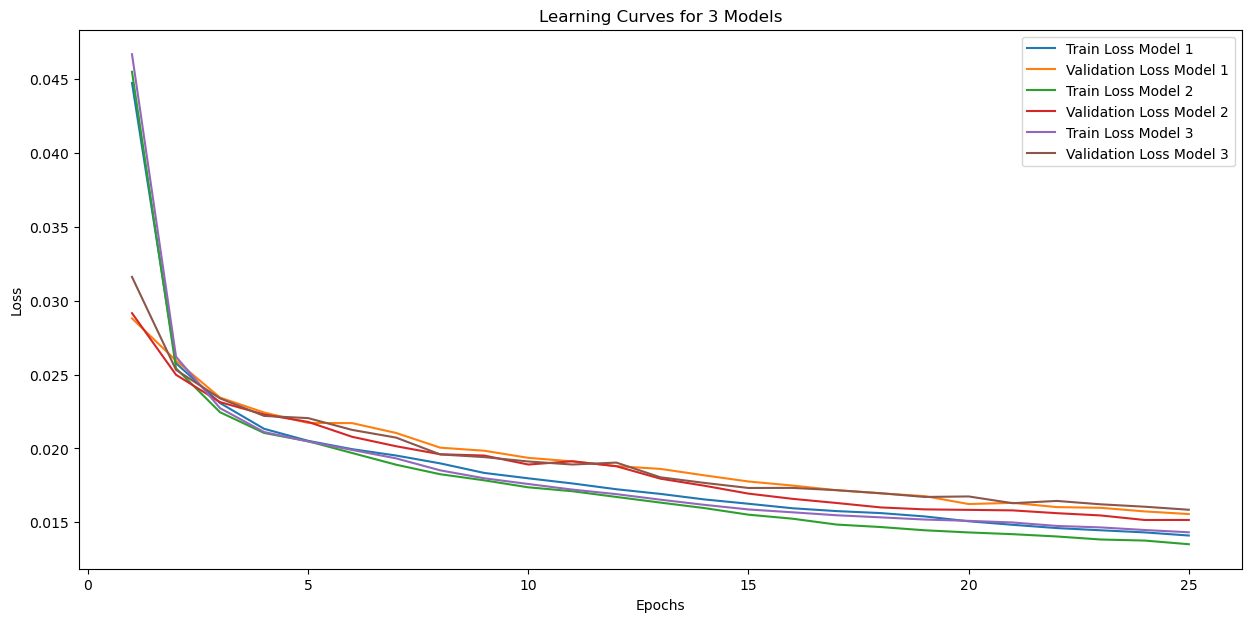

In [16]:
# ONE CODE

# initialization
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model_1 = BigAutoencoder()
model_2 = BigAutoencoder_16()
model_3 = BigAutoencoder_8()
models = [model_1, model_2, model_3]

criterion = nn.MSELoss()

# Lists to store losses
train_losses = [[], [], []]
val_losses = [[], [], []]
print(train_losses)
print(val_losses)

# train 
num_epochs = 25
for idx, model in enumerate(models):
    model.to(device)
    model.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
    for epoch in range(num_epochs):
        epoch_train_loss = 0
        for batch in train_loader:
            batch = batch.to(device)
            batch_reshaped = batch

            optimizer.zero_grad()
            output = model(batch)

            loss = criterion(output, batch_reshaped)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        epoch_train_loss /= len(train_loader)
        train_losses[idx].append(epoch_train_loss)

        # validation loss
        with torch.no_grad():
            val_loss = 0
            for val_batch, _ in val_loader:
                val_batch = val_batch.to(device)
                val_batch_reshaped = val_batch
                val_output = model(val_batch)
                val_loss += criterion(val_output, val_batch_reshaped)
            val_loss /= len(val_loader)
            val_losses[idx].append(val_loss.item())

        print(f'Model nr {idx}. Epoch [{epoch+1}/{num_epochs}], Train_loss: {epoch_train_loss:.4f}, Val_loss: {val_loss.item():.4f}')

# Plot the learning curve for 3 models
plt.figure(figsize=(15, 7))
for idx in range(3):
    plt.plot(range(1, num_epochs + 1), train_losses[idx], label=f'Train Loss Model {idx+1}')
    plt.plot(range(1, num_epochs + 1), val_losses[idx], label=f'Validation Loss Model {idx+1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves for 3 Models')
plt.legend()
plt.show()


In [17]:
thresholds = torch.linspace(0, 1, 20)

all_predictions = [[] for _ in range(len(models))]
all_labels = [[] for _ in range(len(models))]
for idx, model in enumerate(models):
    model.eval()
    with torch.no_grad():
        for val_batch, val_label in val_loader_reduced:
            for example, label in zip(val_batch, val_label):
                example = example.to(device)
                out = model(example)
                all_predictions[idx].append(criterion(example, out).unsqueeze(0))
                all_labels[idx].append(label.unsqueeze(0))

# concatenate all predictions and labels and change it to tensor
for idx, l in enumerate(all_predictions):
    all_predictions[idx] = torch.cat(l)
    all_labels[idx] = torch.cat(all_labels[idx])

    assert len(all_predictions[idx]) == len(all_labels[idx])
    assert len(all_predictions[idx]) == len(val_data_reduced)


tprs = [[] for _ in range(len(models))]
fprs = [[] for _ in range(len(models))]
f1_scores = [[] for _ in range(len(models))]
precisions = [[] for _ in range(len(models))]
recalls = [[] for _ in range(len(models))]
sorted_labels = [[] for _ in range(len(models))]

# sort all_predictions and all_labels according to all_predictions
for idx, predictions in enumerate(all_predictions):
    all_predictions[idx], indices = torch.sort(predictions, descending=True)
    sorted_labels[idx] = [all_labels[idx][i] for i in indices.cpu()]
    neg_pos_labels = torch.tensor([1 if label == ANOMALY_LABEL else 0 for label in sorted_labels[idx]])
    sorted_labels_indices = torch.tensor(sorted_labels[idx])

    # indices of 0
    zeros_indices = sorted_labels_indices == ANOMALY_LABEL
    # indices of other digits
    other_indices = sorted_labels_indices != ANOMALY_LABEL
    for threshold in thresholds:
        positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), threshold)
        negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), threshold)

        tp = positive_class[zeros_indices].sum()
        fn = negative_class[zeros_indices].sum()
        tn = negative_class[other_indices].sum()
        fp = positive_class[other_indices].sum()

        tpr = tp/(tp + fn)
        fpr = fp/(fp + tn)
        fprs[idx].append(fpr.cpu())
        tprs[idx].append(tpr.cpu())

        f1_score = 2*tp/(2*tp + fp + fn)
        precision = tp/(tp + fp)
        recall = tp/(tp + fn)

        f1_scores[idx].append(f1_score.cpu())
        precisions[idx].append(precision.cpu())
        recalls[idx].append(recall.cpu())

    # Find the threshold with the highest F1 score
    best_threshold_index = torch.argmax(torch.tensor(f1_scores[idx]))
    best_threshold = thresholds[best_threshold_index]
    best_precision = precisions[idx][best_threshold_index]
    best_recall = recalls[idx][best_threshold_index]

    print(f'Model nr {idx}. Best Threshold: {best_threshold:.4f}')
    print(f'Model nr {idx}. Precision at Best Threshold: {best_precision:.4f}')
    print(f'Model nr {idx}. Recall at Best Threshold: {best_recall:.4f}')

    positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])
    negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])

    tp = positive_class[zeros_indices].sum()
    fn = negative_class[zeros_indices].sum()
    tn = negative_class[other_indices].sum()
    fp = positive_class[other_indices].sum()

    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)



Model nr 0. Best Threshold: 0.4211
Model nr 0. Precision at Best Threshold: 0.7646
Model nr 0. Recall at Best Threshold: 0.8925
Model nr 1. Best Threshold: 0.3684
Model nr 1. Precision at Best Threshold: 0.7257
Model nr 1. Recall at Best Threshold: 0.9229
Model nr 2. Best Threshold: 0.4211
Model nr 2. Precision at Best Threshold: 0.7574
Model nr 2. Recall at Best Threshold: 0.8834


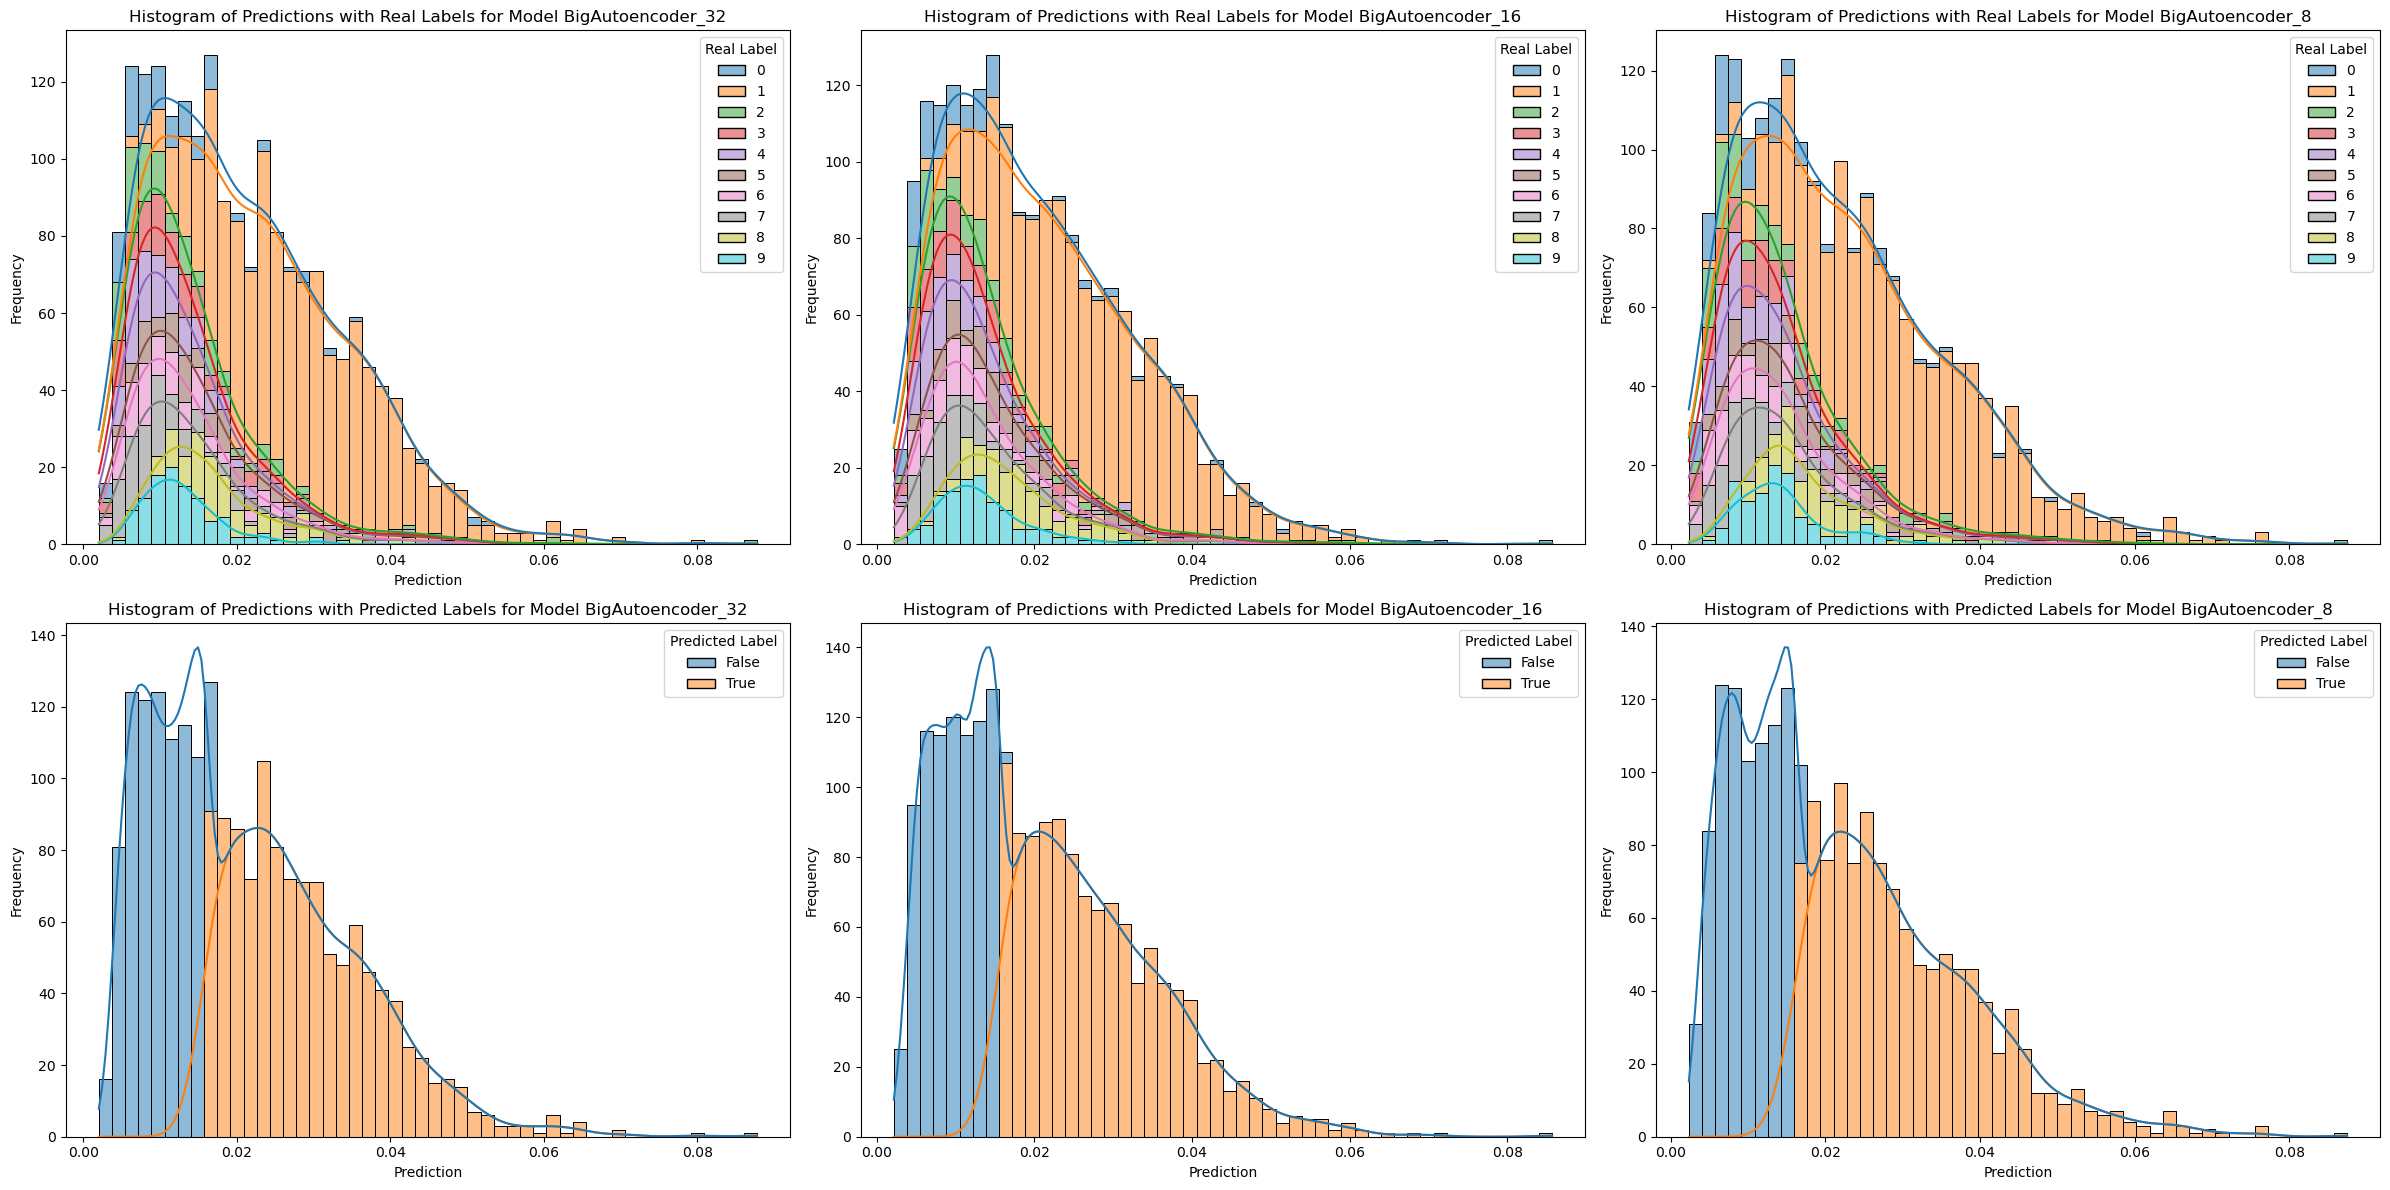

In [18]:
import seaborn as sns
import pandas as pd

names = {
    0: 'BigAutoencoder_32',
    1: 'BigAutoencoder_16',
    2: 'BigAutoencoder_8'
}

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()
    predicted_labels_np = (all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])).cpu().numpy()

    # Create a DataFrame for easier plotting
    data = {
        'Prediction': all_predictions_np,
        'Real Label': sorted_labels_np,
        'Predicted Label': predicted_labels_np
    }

    df = pd.DataFrame(data)

    # Plot the histogram of predictions with real labels
    sns.histplot(data=df, x='Prediction', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[0, idx])
    axes[0, idx].set_title(f'Histogram of Predictions with Real Labels for Model {names[idx]}')
    axes[0, idx].set_xlabel('Prediction')
    axes[0, idx].set_ylabel('Frequency')

    # Plot the histogram of predictions with predicted labels
    sns.histplot(data=df, x='Prediction', hue='Predicted Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[1, idx])
    axes[1, idx].set_title(f'Histogram of Predictions with Predicted Labels for Model {names[idx]}')
    axes[1, idx].set_xlabel('Prediction')
    axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

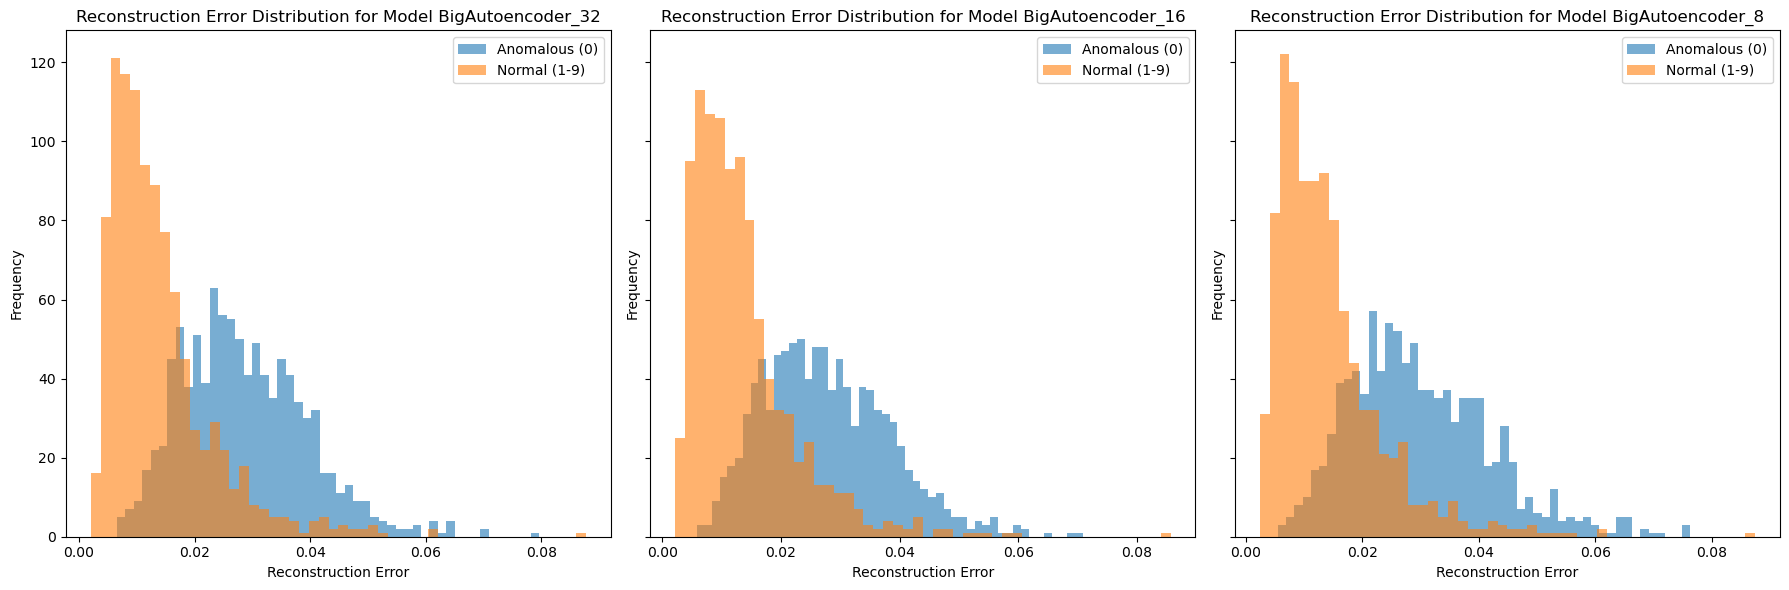

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()

    # Plot the histogram
    axes[idx].hist(all_predictions_np[sorted_labels_np == ANOMALY_LABEL], bins=50, alpha=0.6, label="Anomalous (0)")
    axes[idx].hist(all_predictions_np[sorted_labels_np != ANOMALY_LABEL], bins=50, alpha=0.6, label="Normal (1-9)")
    axes[idx].set_xlabel("Reconstruction Error")
    axes[idx].set_ylabel("Frequency")
    axes[idx].set_title(f"Reconstruction Error Distribution for Model {names[idx]}")
    axes[idx].legend()

plt.tight_layout()
plt.show()

## Autoencoder

[[], [], []]
[[], [], []]
Model nr 0. Epoch [1/20], Train_loss: 0.0406, Val_loss: 0.0277
Model nr 0. Epoch [2/20], Train_loss: 0.0235, Val_loss: 0.0232
Model nr 0. Epoch [3/20], Train_loss: 0.0211, Val_loss: 0.0221
Model nr 0. Epoch [4/20], Train_loss: 0.0197, Val_loss: 0.0203
Model nr 0. Epoch [5/20], Train_loss: 0.0184, Val_loss: 0.0190
Model nr 0. Epoch [6/20], Train_loss: 0.0172, Val_loss: 0.0186
Model nr 0. Epoch [7/20], Train_loss: 0.0164, Val_loss: 0.0181
Model nr 0. Epoch [8/20], Train_loss: 0.0159, Val_loss: 0.0171
Model nr 0. Epoch [9/20], Train_loss: 0.0154, Val_loss: 0.0167
Model nr 0. Epoch [10/20], Train_loss: 0.0149, Val_loss: 0.0163
Model nr 0. Epoch [11/20], Train_loss: 0.0145, Val_loss: 0.0157
Model nr 0. Epoch [12/20], Train_loss: 0.0142, Val_loss: 0.0154
Model nr 0. Epoch [13/20], Train_loss: 0.0139, Val_loss: 0.0153
Model nr 0. Epoch [14/20], Train_loss: 0.0136, Val_loss: 0.0149
Model nr 0. Epoch [15/20], Train_loss: 0.0133, Val_loss: 0.0145
Model nr 0. Epoch [16/2

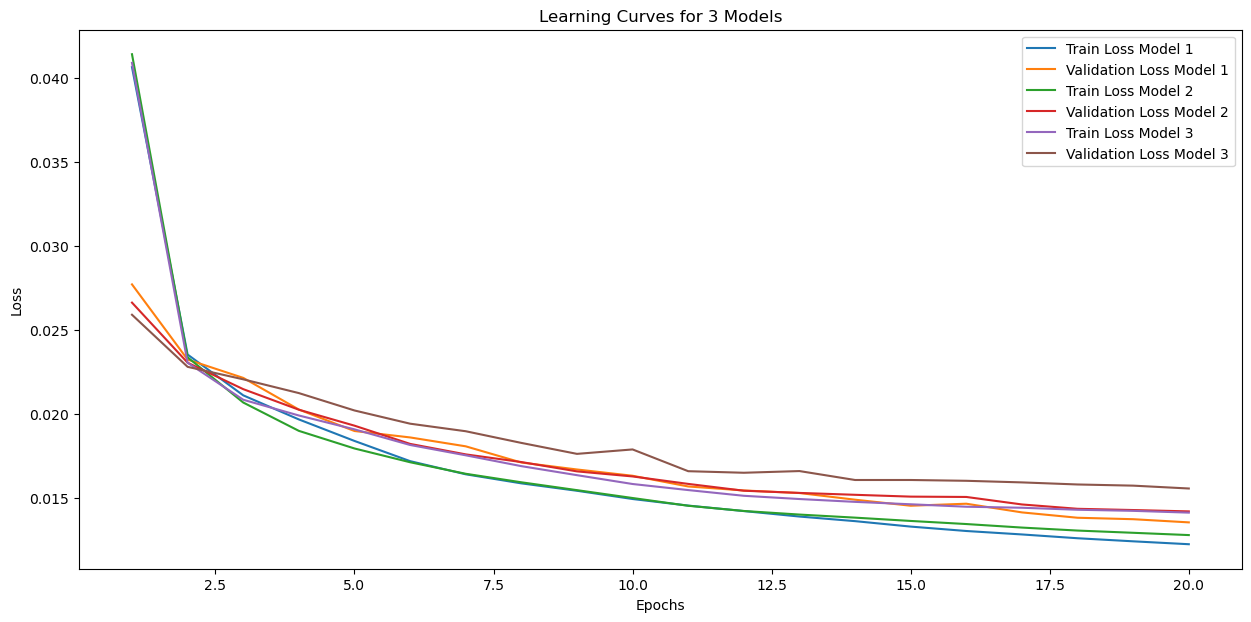

In [20]:
# ONE CODE

# initialization
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model_1 = Autoencoder()
model_2 = Autoencoder_16()
model_3 = Autoencoder_8()
models = [model_1, model_2, model_3]

criterion = nn.MSELoss()

# Lists to store losses
train_losses = [[], [], []]
val_losses = [[], [], []]
print(train_losses)
print(val_losses)

# train 
num_epochs = 20
for idx, model in enumerate(models):
    model.to(device)
    model.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
    for epoch in range(num_epochs):
        epoch_train_loss = 0
        for batch in train_loader:
            batch = batch.to(device)
            batch_reshaped = batch

            optimizer.zero_grad()
            output = model(batch)

            loss = criterion(output, batch_reshaped)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        epoch_train_loss /= len(train_loader)
        train_losses[idx].append(epoch_train_loss)

        # validation loss
        with torch.no_grad():
            val_loss = 0
            for val_batch, _ in val_loader:
                val_batch = val_batch.to(device)
                val_batch_reshaped = val_batch
                val_output = model(val_batch)
                val_loss += criterion(val_output, val_batch_reshaped)
            val_loss /= len(val_loader)
            val_losses[idx].append(val_loss.item())

        print(f'Model nr {idx}. Epoch [{epoch+1}/{num_epochs}], Train_loss: {epoch_train_loss:.4f}, Val_loss: {val_loss.item():.4f}')

# Plot the learning curve for 3 models
plt.figure(figsize=(15, 7))
for idx in range(3):
    plt.plot(range(1, num_epochs + 1), train_losses[idx], label=f'Train Loss Model {idx+1}')
    plt.plot(range(1, num_epochs + 1), val_losses[idx], label=f'Validation Loss Model {idx+1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves for 3 Models')
plt.legend()
plt.show()


In [21]:
thresholds = torch.linspace(0, 1, 20)

all_predictions = [[] for _ in range(len(models))]
all_labels = [[] for _ in range(len(models))]
for idx, model in enumerate(models):
    model.eval()
    with torch.no_grad():
        for val_batch, val_label in val_loader_reduced:
            for example, label in zip(val_batch, val_label):
                example = example.to(device)
                out = model(example)
                all_predictions[idx].append(criterion(example, out).unsqueeze(0))
                all_labels[idx].append(label.unsqueeze(0))

# concatenate all predictions and labels and change it to tensor
for idx, l in enumerate(all_predictions):
    all_predictions[idx] = torch.cat(l)
    all_labels[idx] = torch.cat(all_labels[idx])

    assert len(all_predictions[idx]) == len(all_labels[idx])
    assert len(all_predictions[idx]) == len(val_data_reduced)


tprs = [[] for _ in range(len(models))]
fprs = [[] for _ in range(len(models))]
f1_scores = [[] for _ in range(len(models))]
precisions = [[] for _ in range(len(models))]
recalls = [[] for _ in range(len(models))]
sorted_labels = [[] for _ in range(len(models))]

# sort all_predictions and all_labels according to all_predictions
for idx, predictions in enumerate(all_predictions):
    all_predictions[idx], indices = torch.sort(predictions, descending=True)
    sorted_labels[idx] = [all_labels[idx][i] for i in indices.cpu()]
    neg_pos_labels = torch.tensor([1 if label == ANOMALY_LABEL else 0 for label in sorted_labels[idx]])
    sorted_labels_indices = torch.tensor(sorted_labels[idx])

    # indices of 0
    zeros_indices = sorted_labels_indices == 0
    # indices of other digits
    other_indices = sorted_labels_indices != 0
    for threshold in thresholds:
        positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), threshold)
        negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), threshold)

        tp = positive_class[zeros_indices].sum()
        fn = negative_class[zeros_indices].sum()
        tn = negative_class[other_indices].sum()
        fp = positive_class[other_indices].sum()

        tpr = tp/(tp + fn)
        fpr = fp/(fp + tn)
        fprs[idx].append(fpr.cpu())
        tprs[idx].append(tpr.cpu())

        f1_score = 2*tp/(2*tp + fp + fn)
        precision = tp/(tp + fp)
        recall = tp/(tp + fn)

        f1_scores[idx].append(f1_score.cpu())
        precisions[idx].append(precision.cpu())
        recalls[idx].append(recall.cpu())

    # Find the threshold with the highest F1 score
    best_threshold_index = torch.argmax(torch.tensor(f1_scores[idx]))
    best_threshold = thresholds[best_threshold_index]
    best_precision = precisions[idx][best_threshold_index]
    best_recall = recalls[idx][best_threshold_index]

    print(f'Model nr {idx}. Best Threshold: {best_threshold:.4f}')
    print(f'Model nr {idx}. Precision at Best Threshold: {best_precision:.4f}')
    print(f'Model nr {idx}. Recall at Best Threshold: {best_recall:.4f}')

    positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])
    negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])

    tp = positive_class[zeros_indices].sum()
    fn = negative_class[zeros_indices].sum()
    tn = negative_class[other_indices].sum()
    fp = positive_class[other_indices].sum()

    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)



Model nr 0. Best Threshold: 0.0000
Model nr 0. Precision at Best Threshold: 0.0544
Model nr 0. Recall at Best Threshold: 1.0000
Model nr 1. Best Threshold: 0.0000
Model nr 1. Precision at Best Threshold: 0.0544
Model nr 1. Recall at Best Threshold: 1.0000
Model nr 2. Best Threshold: 0.0000
Model nr 2. Precision at Best Threshold: 0.0544
Model nr 2. Recall at Best Threshold: 1.0000


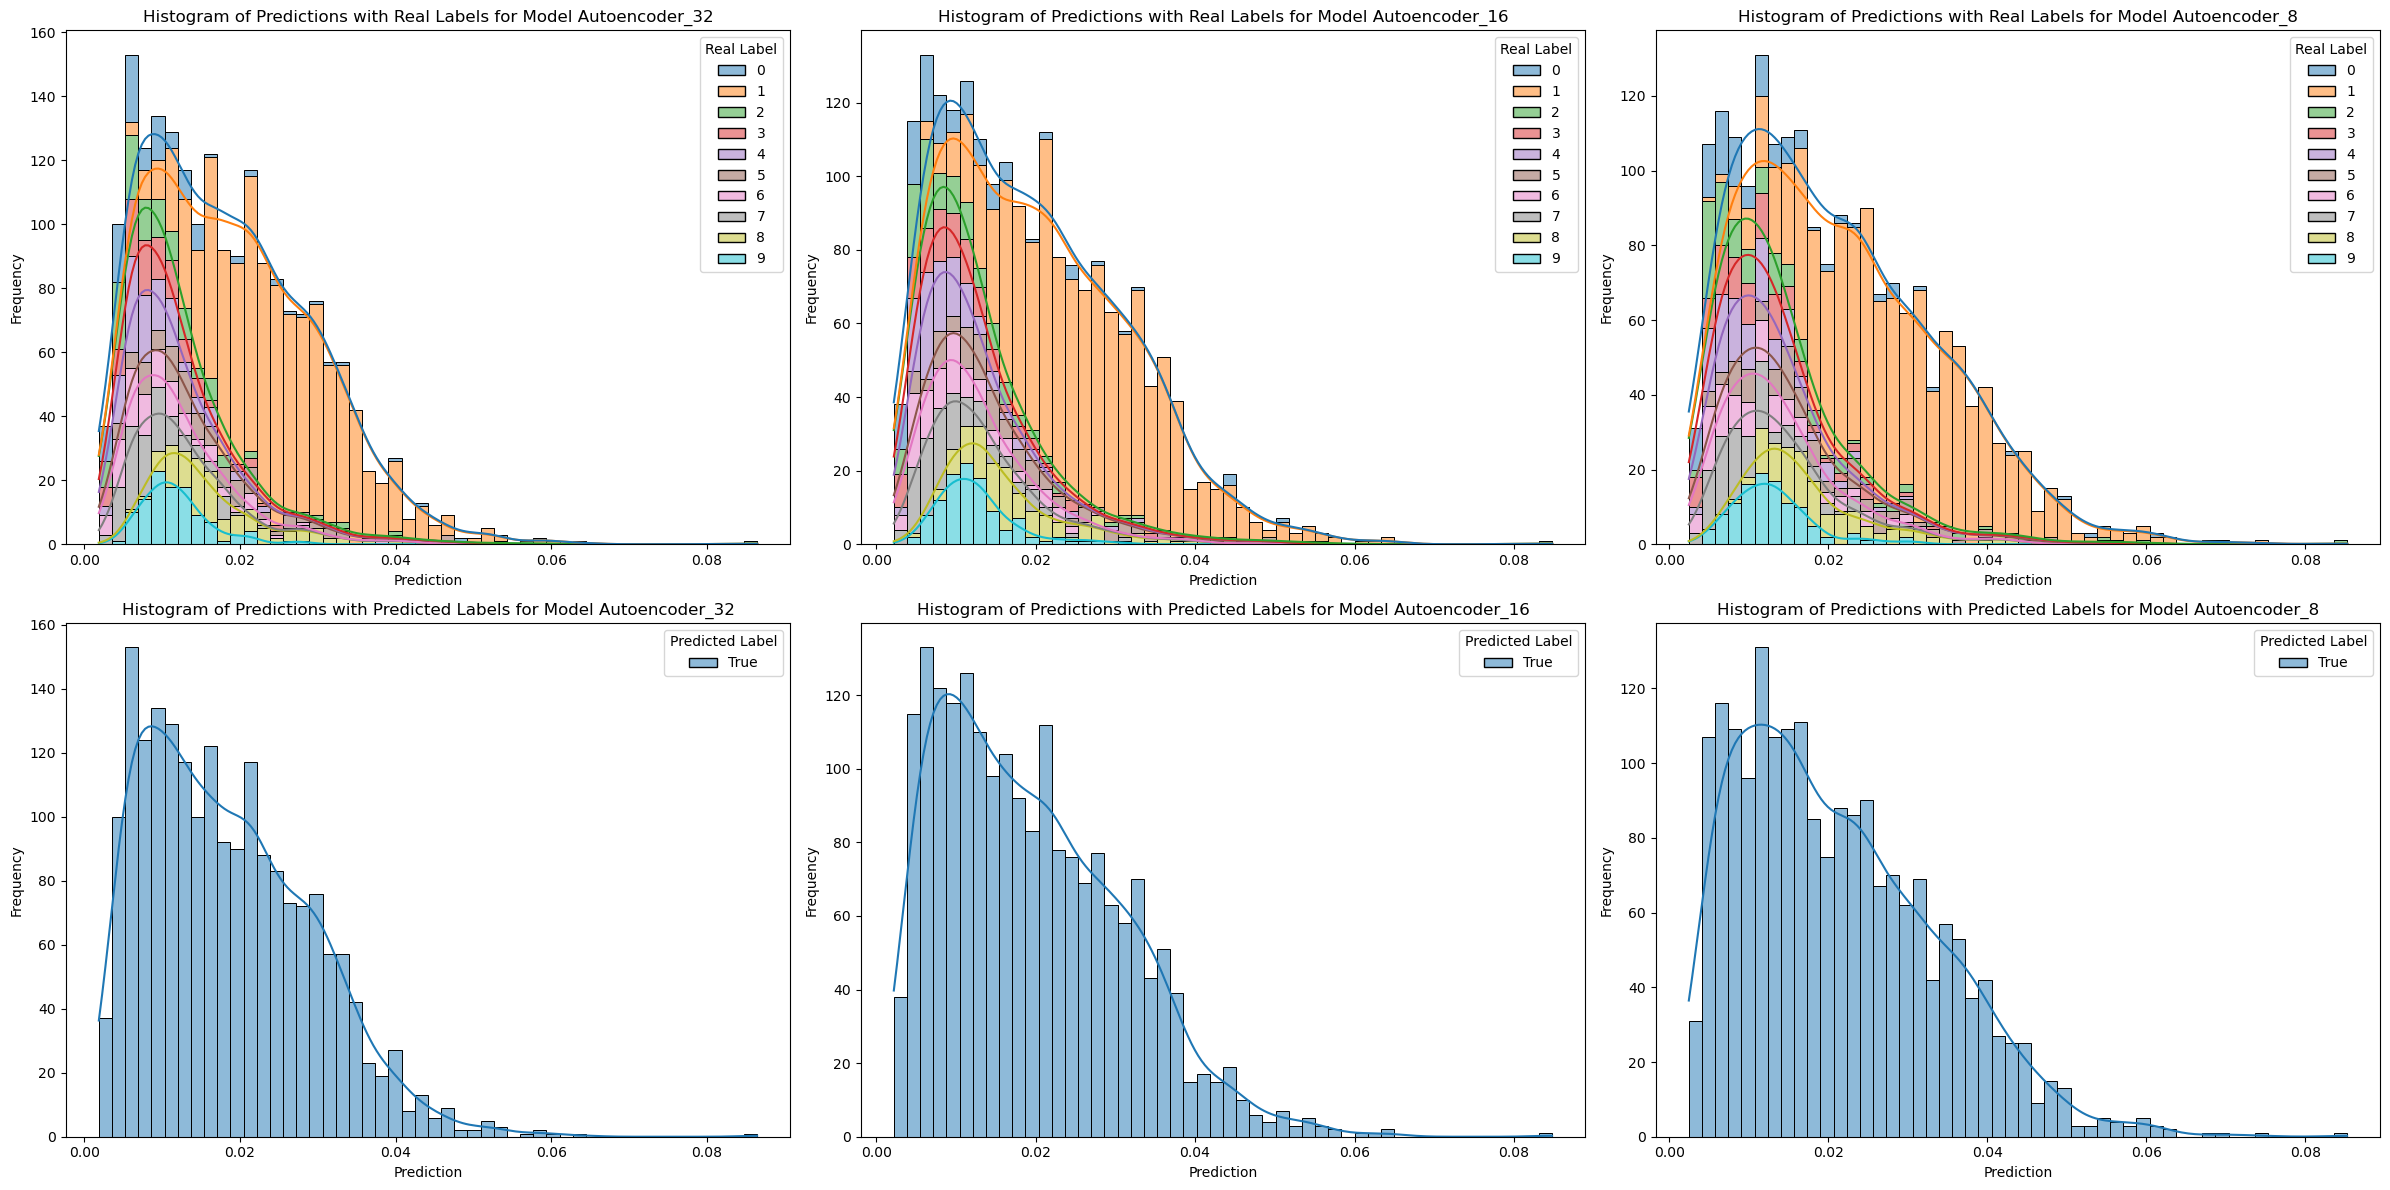

In [22]:
import seaborn as sns
import pandas as pd

names = {
    0: 'Autoencoder_32',
    1: 'Autoencoder_16',
    2: 'Autoencoder_8'
}

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()
    predicted_labels_np = (all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])).cpu().numpy()

    # Create a DataFrame for easier plotting
    data = {
        'Prediction': all_predictions_np,
        'Real Label': sorted_labels_np,
        'Predicted Label': predicted_labels_np
    }

    df = pd.DataFrame(data)

    # Plot the histogram of predictions with real labels
    sns.histplot(data=df, x='Prediction', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[0, idx])
    axes[0, idx].set_title(f'Histogram of Predictions with Real Labels for Model {names[idx]}')
    axes[0, idx].set_xlabel('Prediction')
    axes[0, idx].set_ylabel('Frequency')

    # Plot the histogram of predictions with predicted labels
    sns.histplot(data=df, x='Prediction', hue='Predicted Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[1, idx])
    axes[1, idx].set_title(f'Histogram of Predictions with Predicted Labels for Model {names[idx]}')
    axes[1, idx].set_xlabel('Prediction')
    axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

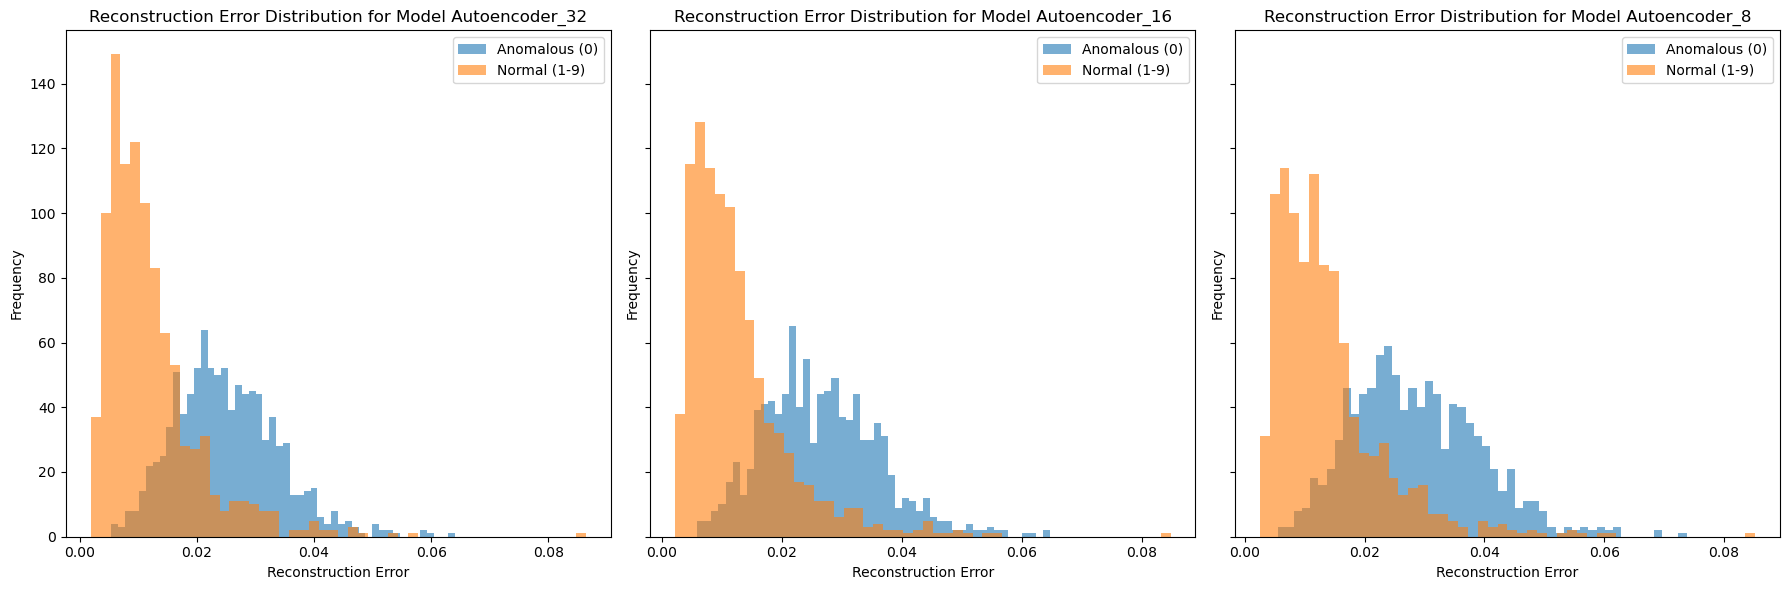

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()

    # Plot the histogram
    axes[idx].hist(all_predictions_np[sorted_labels_np == ANOMALY_LABEL], bins=50, alpha=0.6, label="Anomalous (0)")
    axes[idx].hist(all_predictions_np[sorted_labels_np != ANOMALY_LABEL], bins=50, alpha=0.6, label="Normal (1-9)")
    axes[idx].set_xlabel("Reconstruction Error")
    axes[idx].set_ylabel("Frequency")
    axes[idx].set_title(f"Reconstruction Error Distribution for Model {names[idx]}")
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [ ]:
# class VAE(nn.Module):
#     def __init__(self):
#         super(VAE, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Linear(784, 256),
#             nn.ReLU(),
#             nn.Linear(256, 128),
#             nn.ReLU(),
#             nn.Linear(128, 64),
#             nn.ReLU(),
#             nn.Linear(64, 32)
#         )
#         self.mu_layer = nn.Linear(32, 16)
#         self.logvar_layer = nn.Linear(32, 16)
#         self.decoder = nn.Sequential(
#             nn.Linear(16, 32),
#             nn.ReLU(),
#             nn.Linear(32, 64),
#             nn.ReLU(),
#             nn.Linear(64, 128),
#             nn.ReLU(),
#             nn.Linear(128, 256),
#             nn.ReLU(),
#             nn.Linear(256, 784),
#             nn.Sigmoid()
#         )

#     def encode(self, x):
#         h = self.encoder(x)
#         return self.mu_layer(h), self.logvar_layer(h)

#     def reparameterize(self, mu, logvar):
#         std = torch.exp(0.5 * logvar)
#         eps = torch.randn_like(std)
#         return mu + eps * std

#     def decode(self, z):
#         return self.decoder(z)

#     def forward(self, x):
#         mu, logvar = self.encode(x)
#         z = self.reparameterize(mu, logvar)
#         return self.decode(z), mu, logvar

# def vae_loss(recon_x, x, mu, logvar):
#     BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
#     KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
#     return BCE + KLD

# # initialization
# device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
# vae_model = VAE().to(device)
# optimizer = torch.optim.Adam(vae_model.parameters(), lr=2e-3)

# # train 
# num_epochs = 20
# vae_model.train()
# for epoch in range(num_epochs):
#     train_loss = 0
#     for batch in train_loader:
#         batch = batch.to(device)
#         optimizer.zero_grad()
#         recon_batch, mu, logvar = vae_model(batch)
#         loss = vae_loss(recon_batch, batch, mu, logvar)
#         loss.backward()
#         train_loss += loss.item()
#         optimizer.step()

#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss / len(train_loader.dataset):.4f}')

# # Evaluate and create histogram of predictions
# vae_model.eval()
# all_predictions = []
# all_labels = []
# with torch.no_grad():
#     for val_batch, val_label in val_loader_reduced:
#         for example, label in zip(val_batch, val_label):
#             example = example.view(-1).to(device)
#             recon_example, mu, logvar = vae_model(example)
#             all_predictions.append(vae_loss(recon_example, example, mu, logvar).unsqueeze(0))
#             all_labels.append(label.unsqueeze(0))

# # concatenate all predictions and labels and change it to tensor
# all_predictions = torch.cat(all_predictions)
# all_labels = torch.cat(all_labels)

# # sort all_predictions and all_labels according to all_predictions
# all_predictions, indices = torch.sort(all_predictions, descending=True)
# sorted_labels = [all_labels[i] for i in indices.cpu()]
# sorted_labels = torch.tensor(sorted_labels)

# # Convert predictions and labels to numpy arrays for plotting
# all_predictions_np = all_predictions.cpu().numpy()
# sorted_labels_np = sorted_labels.cpu().numpy()

# # Create a DataFrame for easier plotting
# data = {
#     'Prediction': all_predictions_np,
#     'Real Label': sorted_labels_np
# }

# df = pd.DataFrame(data)

# # Plot the histogram
# plt.figure(figsize=(12, 6))
# sns.histplot(data=df, x='Prediction', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True)
# plt.title('Histogram of VAE Predictions with Real Labels')
# plt.xlabel('Prediction')
# plt.ylabel('Frequency')
# plt.show()